<a href="https://colab.research.google.com/github/mokranerachedi/customer-churn-prediction/blob/main/Customer_Churn_Predicition_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Costumer Churn Prediction using Machine Learning

## Problem Definition

Customer churn happens when customers decide to not continue purchasing products/services from an organization and end their association. This phenomenon is inevitable, one day or another, all companies lose customers. In fact, there can be many reasons for this: a decrease in the need, a loss of interest in the product or service offered, a better offer from a competitor, a price increase, etc…

For many years now, companies have been putting in place colossal means to reduce churn and maintain their customer base. This is not surprising when you know that several researches prove that it is always more expensive (between 5 to 25 times more expensive according to [the Harvard Review study](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers)) to get new customers than to keep existing ones. However, in today's world with the power of artificial intelligence, it can be done easily and automatically thanks to what is called Machine Learning.

In this project, we will work on customer data from a telecom company ([published on kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)) to build a machine learning model that will predict whether a customer will churn from the company's services or not. The goal is to allow the company in question to better target and retain customers with a high risk of churn.

## Import packages

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
%matplotlib inline
plt.style.use('ggplot')

## Load data

In [91]:
url = "https://raw.githubusercontent.com/mokranerachedi/customer-churn-prediction/main/Telco-Churn.csv"
df = pd.read_csv(url)

## Exploratory Data Analysis

In [92]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

In this data set the target variable is Churn which takes two values **Yes (the customer churned)** and **No (the customer didn't churn)**.

So, in this project we have a classification problem since the target variable is a categorical variable, more precisely it is a binary classification problem since the target variable takes only two values.


In [93]:
df.shape

(7043, 21)

The raw data contains 7043 rows (customers) and 21 columns (features).

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Apparently, the data set does not contain any missing values, we are going to confirm this during the analysis of the variables.

The variable TotalCharges is considered as an object when it should be a numeric variable of type float64, we will transform it later.

In [95]:
# The unique values of each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

The variable customerID has 7043 unique values, so we have 7043 unique customers.

We notice that the categorial variables are the variables which contain generally less than 5 values.

### Univariate analysis


In [96]:
df.drop(columns=["customerID"], inplace=True)

#### Categorical variables

In [97]:
# The list of categorical variables
categorical_variables = df.nunique()[df.nunique() < 5].index.to_list()
categorical_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In the following, we will create a function that will build bar graphs for category variables in an interactive way with ipywidgets.

In [98]:
def bar_plot(x):
    """
    A function that displays a bar graph for each category variable of x
    
    x: list
    """
    df[x].value_counts(normalize=True).plot(kind="bar")
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.title("The distribution of " + str(x))
    plt.show()

In [99]:
# The interact function
interact(bar_plot, x = categorical_variables);

interactive(children=(Dropdown(description='x', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

In the following, we will create a function that will build a pie charts for each categorical variable interactively with ipywidgets.

In [100]:
def pie_plot(x):
    """
    A function that A function that displays a pie chart for each category variable of x.

    x: list
    """
    df[x].value_counts(normalize=True).plot(kind="pie", autopct='%1.0f%%')
    plt.title("The distribution of " + str(x))
    plt.legend()
    plt.show()

In [101]:
# The interact function
interact(pie_plot, x=categorical_variables);

interactive(children=(Dropdown(description='x', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

- We notice that there are more clients who didn't leave (73%) than those who left (27%).
- We also notice that there is a class imbalance in the target variable (Churn) that we have to solve in order to not to compromise the training of the machine learning models.
- The company has much more of a younger clientele (84%) than an older one (16%).
- Customers who have dependents are less (30%) than those who do not (70%).
- The gender of the customers is in equal proportions.
- The customers who have partners and those who don't are almost equally divided. 
- There are many more customers with monthly subscriptions (55%).


#### Numerical variables

First we need to analyze the variable TotalCharges to understand why it is considered as an object type.

In [102]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

The variable TotalCharges is considered as an object type because it has 11 empty string values. We'll transform these values into NaN values and also transform TotalCharges into float64 type.

In [103]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan).astype(float)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [105]:
# The list of numerical variables
numerical_variables = df.nunique()[df.nunique() > 5].index.to_list()
numerical_variables

['tenure', 'MonthlyCharges', 'TotalCharges']

In the following, we will create a function that allows to build a histogram for each numerical variable in an interactive way with ipywidgets.

In [106]:
def hist_plot(x):
    """
    A function that displays an histogram for each numerical variable of x.

    x:list
    """
    sns.displot(df[x], kde=True)
    plt.title("Histogram of " + str(x))
    plt.show()

In [107]:
interact(hist_plot, x=numerical_variables);

interactive(children=(Dropdown(description='x', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

We notice that the variable TotalCharges is very asymmetric.

In the following, we will create a function that allows to build a boxplot for each numerical variable in an interactive way with ipywidgets.

In [108]:
def box_plot(x):
    """
    A function that displays a boxplot for each numerical variable of x.

    x: list
    """
    sns.boxplot(y = df[x])
    plt.title("Boxplot of " + str(x))
    plt.show()

In [109]:
interact(box_plot, x=numerical_variables);

interactive(children=(Dropdown(description='x', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

The numerical variables don't have outliers.

### Multivariate analysis

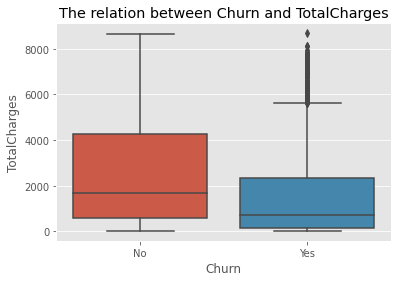

In [110]:
# Churn & TotalCharges
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("The relation between Churn and TotalCharges")
plt.show()

The total amount billed to customers who have left is less than the total amount billed to customers who have not left.

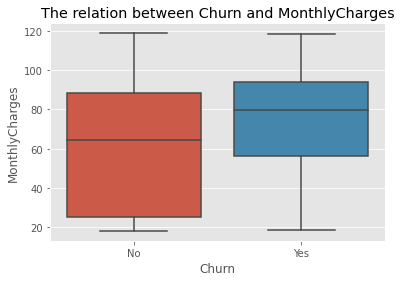

In [111]:
# Churn & MonthlyCharges
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("The relation between Churn and MonthlyCharges")
plt.show()

Here, we notice that the monthly amount billed to customers who have left is greater than the monthly amount billed to customers who have not left.

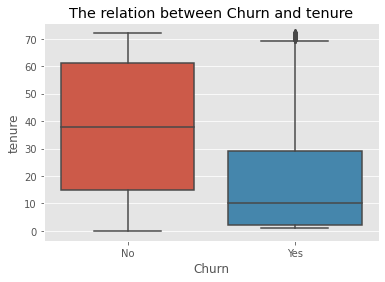

In [112]:
# Churn & tenure
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("The relation between Churn and tenure")
plt.show()

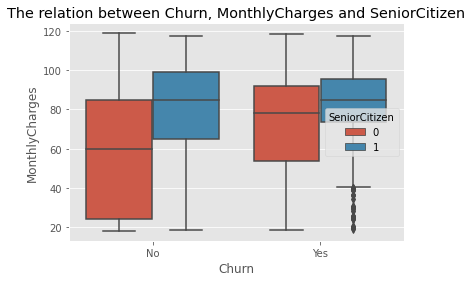

In [113]:
# Churn & MonthlyCharges & SeniorCitizen
sns.boxplot(x="Churn", y="MonthlyCharges", hue="SeniorCitizen", data=df)
plt.title("The relation between Churn, MonthlyCharges and SeniorCitizen")
plt.show()

Whether churned or not, senior customers are much more likely to be billed than younger ones.

## Data preprocessing

In [114]:
df_dp = df.copy()

### Handling missing values

In [115]:
df_dp.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [116]:
(11/7043)

0.001561834445548772

In [117]:
# Drop the missing values
df_dp.dropna(inplace=True)

In [118]:
df_dp.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now, there are no missing values in the data set. 

### Encoding categorical data

In [119]:
df_dp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [120]:
df_dp.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [121]:
# Binary column: variables that contain only two variables.
binary_columns = df_dp.nunique()[df_dp.nunique() < 3].index.to_list()
binary_columns.remove("gender")
binary_columns.remove("SeniorCitizen")
binary_columns

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

In [122]:
df_dp[binary_columns]

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Yes,No,No,Yes,No
1,No,No,Yes,No,No
2,No,No,Yes,Yes,Yes
3,No,No,No,No,No
4,No,No,Yes,Yes,Yes
...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,No
7041,Yes,No,Yes,Yes,Yes


In [123]:
for column in binary_columns:
    df_dp[column] = df_dp[column].apply(lambda row: 1 if row == "Yes" else 0)

In [124]:
df_dp[binary_columns]

,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1
...,...,...,...,...,...
7038,1,1,1,1,0
7039,1,1,1,1,0
7040,1,1,0,1,0
7041,1,0,1,1,1


In [125]:
df_dp["gender"] = df_dp["gender"].apply(lambda row: 1 if row == "Female" else 0)

In [126]:
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [127]:
remaining_categorical_columns = df_dp[categorical_variables].nunique()[df_dp[categorical_variables].nunique() > 2].index.to_list()
remaining_categorical_columns

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

We'll transform these remaining categorical variables with pd.getdummies().

In [128]:
remaining_categorical_columns_dummies = pd.get_dummies(data=df_dp[remaining_categorical_columns], columns=remaining_categorical_columns, drop_first=True)

In [129]:
remaining_categorical_columns_dummies.head()

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


We will create a new dataframe with the encoded data.

In [130]:
df_encoded = pd.concat([df_dp[["gender", "SeniorCitizen"]], df_dp[binary_columns], df_dp[numerical_variables], remaining_categorical_columns_dummies], axis=1)

In [131]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,tenure,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,0,1,29.85,29.85,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,34,56.95,1889.50,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,1,1,2,53.85,108.15,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,45,42.30,1840.75,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,1,1,2,70.70,151.65,...,0,0,0,0,0,0,0,0,1,0


In [132]:
df_encoded.shape

(7032, 31)

### Solve the asymmetric problem of the variable TotalCharges 

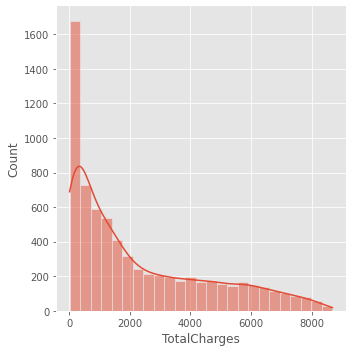

In [133]:
sns.displot(df_encoded["TotalCharges"], kde=True);

In [134]:
df_encoded["TotalCharges"].skew()

0.9616424997242504

In [135]:
df_encoded["TotalCharges"] = np.sqrt(df_encoded["TotalCharges"])

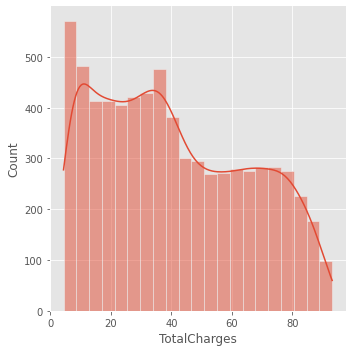

In [136]:
sns.displot(df_encoded["TotalCharges"], kde=True);

In [137]:
df_encoded["TotalCharges"].skew()

0.3089261418986736

### Splitting the dataset

In this section, we will divide the dataset into three parts, one part for model training, a second for validation and the last for testing.

- 60%: Training
- 20%: Validation
- 20%: test

In [138]:
# X: features 
# y: target

y = df_encoded["Churn"]
X = df_encoded.drop("Churn", axis=1)

In [139]:
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=seed, stratify=y_test)

In [140]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

0    0.734297
1    0.265703
Name: Churn, dtype: float64
0    0.733997
1    0.266003
Name: Churn, dtype: float64
0    0.734186
1    0.265814
Name: Churn, dtype: float64


### Solve the imbalance problem of the target class

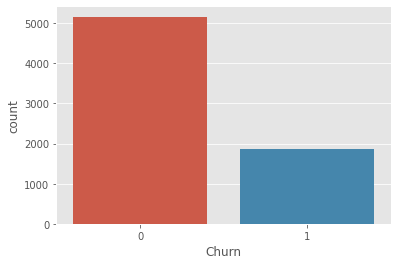

In [141]:
sns.countplot(x="Churn", data=df_encoded);

We notice that there is really a big imbalance in the target variable. We can fix this problem with two techniques which are upsampling and downsampling.

In [142]:
X_train_copy = X_train.copy()
X_train_copy["Churn"] = y_train.values

minority = X_train_copy[X_train_copy["Churn"] == 1]
majority = X_train_copy[X_train_copy["Churn"] == 0]

#### Upsampling

In [143]:
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=seed)
df_upsampled = pd.concat([majority, minority_upsampled])

In [144]:
df_upsampled["Churn"].value_counts(normalize=True)

0    0.5
1    0.5
Name: Churn, dtype: float64

In [145]:
y_train_up = df_upsampled["Churn"]
X_train_up = df_upsampled.drop("Churn", axis=1) 

#### Downsampling

In [146]:
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=seed)
df_downsampled = pd.concat([minority, majority_downsampled])

In [147]:
df_downsampled["Churn"].value_counts(normalize=True)

1    0.5
0    0.5
Name: Churn, dtype: float64

In [148]:
y_train_down = df_downsampled["Churn"]
X_train_down = df_downsampled.drop("Churn", axis=1)

### Training data choices

In [149]:
# For the training data we have several choices available:
# 1 - (X_train, y_train)
# 2 - (X_train_up, y_train_up)
# 3 - (X_train_down, y_train_down)

train_features = X_train_up
train_label = y_train_up

### Data normalisation

In [150]:
scaler = StandardScaler()

model_scaler = scaler.fit(train_features)

train_features = model_scaler.transform(train_features) 
X_val = model_scaler.transform(X_val) 
X_test = model_scaler.transform(X_test) 

# Transform into dataframes
train_features = pd.DataFrame(train_features, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [151]:
train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.991963,-0.490854,-0.887788,-0.584060,0.318608,-1.369857,1.841325,1.570264,2.139708,-0.318608,...,1.712154,-0.446780,1.209396,-0.446780,1.232771,-0.443397,2.169180,-0.477392,-0.838810,-0.521053
1,1.008103,-0.490854,-0.887788,-0.584060,0.318608,0.730003,-1.110673,-0.456967,-1.249635,-0.318608,...,-0.584060,-0.446780,1.209396,-0.446780,-0.811181,-0.443397,-0.461004,-0.477392,1.192165,-0.521053
2,-0.991963,-0.490854,1.126395,1.712154,0.318608,-1.369857,-0.819631,-0.802028,-0.766715,-0.318608,...,-0.584060,-0.446780,-0.826859,-0.446780,-0.811181,-0.443397,-0.461004,-0.477392,-0.838810,-0.521053
3,1.008103,-0.490854,1.126395,-0.584060,0.318608,-1.369857,0.510847,-1.683658,-0.410593,-0.318608,...,-0.584060,2.238236,-0.826859,2.238236,-0.811181,-0.443397,2.169180,-0.477392,-0.838810,1.919191
4,-0.991963,-0.490854,-0.887788,-0.584060,0.318608,0.730003,-0.570167,-1.486974,-0.818897,-0.318608,...,-0.584060,2.238236,-0.826859,2.238236,-0.811181,2.255315,-0.461004,2.094714,-0.838810,-0.521053


### Features selection

In [152]:
rf = RandomForestClassifier()
rf.fit(train_features, train_label)
print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1033
           1       0.61      0.60      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [153]:
rf.feature_importances_

array([0.02647824, 0.01847363, 0.0220131 , 0.01971432, 0.00402591,
       0.02527274, 0.17145365, 0.14570418, 0.17236299, 0.00421981,
       0.01736283, 0.04728774, 0.00794309, 0.00803844, 0.02821983,
       0.00683113, 0.02049564, 0.0101358 , 0.0157207 , 0.00827581,
       0.02344166, 0.01218066, 0.01526157, 0.00513434, 0.01623096,
       0.02847452, 0.05972332, 0.01419396, 0.0321321 , 0.01319731])

In [154]:
# Importance of the variables
var_imp = pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending=False)

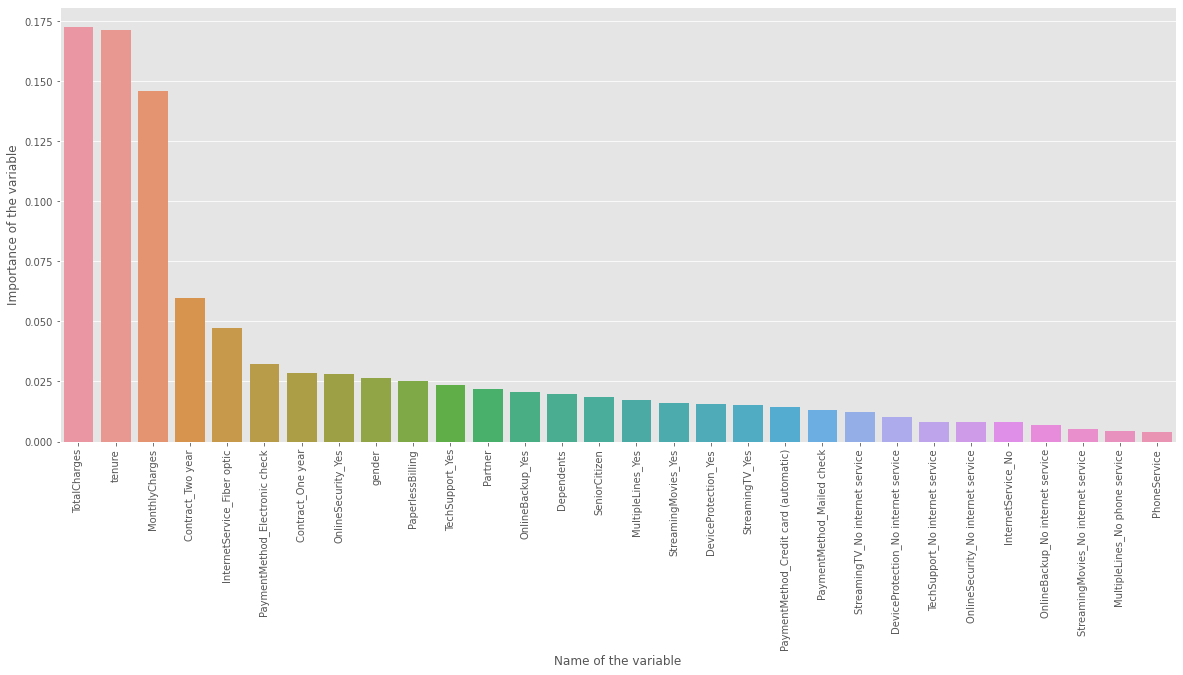

In [155]:
plt.figure(figsize=(20,8))
sns.barplot(x = var_imp.index, y=var_imp)
plt.xticks(rotation=90)
plt.xlabel("Name of the variable")
plt.ylabel("Importance of the variable")
plt.show()

In [156]:
var_imp

TotalCharges                             0.172363
tenure                                   0.171454
MonthlyCharges                           0.145704
Contract_Two year                        0.059723
InternetService_Fiber optic              0.047288
PaymentMethod_Electronic check           0.032132
Contract_One year                        0.028475
OnlineSecurity_Yes                       0.028220
gender                                   0.026478
PaperlessBilling                         0.025273
TechSupport_Yes                          0.023442
Partner                                  0.022013
OnlineBackup_Yes                         0.020496
Dependents                               0.019714
SeniorCitizen                            0.018474
MultipleLines_Yes                        0.017363
StreamingMovies_Yes                      0.016231
DeviceProtection_Yes                     0.015721
StreamingTV_Yes                          0.015262
PaymentMethod_Credit card (automatic)    0.014194


In [157]:
# Selection of variables
limit = 0.01
var_selected = var_imp[var_imp > limit].index.to_list()

In [158]:
var_selected

['TotalCharges',
 'tenure',
 'MonthlyCharges',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'Contract_One year',
 'OnlineSecurity_Yes',
 'gender',
 'PaperlessBilling',
 'TechSupport_Yes',
 'Partner',
 'OnlineBackup_Yes',
 'Dependents',
 'SeniorCitizen',
 'MultipleLines_Yes',
 'StreamingMovies_Yes',
 'DeviceProtection_Yes',
 'StreamingTV_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mailed check',
 'StreamingTV_No internet service',
 'DeviceProtection_No internet service']

In [159]:
train_features = train_features[var_selected] 
X_val = X_val[var_selected]
X_test = X_test[var_selected]

## Modeling

Our objective is to build a model that will predict whether a customer will churn or not. The algorithms we will use for this are:

1. Logistic Regression
2. Random Forest
3. Support Vector Machine

In the following, we will build a function that will allow us to evaluate the models.

### Model Evaluation Function

In [160]:
def model_evaluation(model, features, label):
    pred = model.predict(features)
    print(classification_report(label, pred))

### Logistic Regression

In [161]:
log_hyp = {"C": [0.001, 0.01, 0.1, 1, 10, 50, 100, 500]}

log_cv = GridSearchCV(LogisticRegression(random_state=seed, max_iter=500), 
                      param_grid=log_hyp,
                      scoring="f1",
                      cv=5
                      )
log_cv.fit(train_features, train_label)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 500]},
             scoring='f1')

In [162]:
print(round(log_cv.best_score_, 2))
print(log_cv.best_estimator_)
log_model = log_cv.best_estimator_

0.78
LogisticRegression(C=0.001, max_iter=500, random_state=42)


In [163]:
# Evaluate the logistic regression model with validation data
model_evaluation(log_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.81      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407



#### Recursive Feature Elimination

Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm. RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [164]:
def model_with_rfe(model):
    rfe_model = RFE(estimator=model)
    rfe_model.fit(train_features, train_label)
    mask = rfe_model.support_
    reduced_X = train_features.loc[:, mask]
    print(reduced_X.columns)
    return rfe_model

#### Logistic Regression with RFE

In [165]:
log_model_rfe = model_with_rfe(log_model)
log_model_rfe

Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'Contract_One year', 'OnlineSecurity_Yes', 'PaperlessBilling',
       'StreamingTV_No internet service',
       'DeviceProtection_No internet service'],
      dtype='object')


RFE(estimator=LogisticRegression(C=0.001, max_iter=500, random_state=42))

In [166]:
model_evaluation(log_model_rfe, X_val, y_val)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.82      0.63       374

    accuracy                           0.74      1407
   macro avg       0.71      0.77      0.71      1407
weighted avg       0.81      0.74      0.76      1407



We notice that by applying the RFE on the logistic regression model, the number of features has decreased but the model keeps the same performances.

### 2. Random Forest

In [167]:
rf_hyp = {"n_estimators": [10, 50, 100, 500, 1000],
          "max_depth": [3, 5, 10, 20, None]}

rf_cv = GridSearchCV(RandomForestClassifier(random_state=seed), 
                     param_grid = rf_hyp,
                     scoring="f1",
                     cv=5
                    )

rf_cv.fit(train_features, train_label)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, 20, None],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='f1')

In [168]:
print(round(rf_cv.best_score_, 2))
print(rf_cv.best_estimator_)

rf_model = rf_cv.best_estimator_

0.92
RandomForestClassifier(max_depth=20, n_estimators=1000, random_state=42)


In [169]:
# Evaluate the model
model_evaluation(rf_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1033
           1       0.61      0.60      0.61       374

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



#### Random Forest with RFE

In [170]:
# Random Forest with RFE
rf_model_rfe = model_with_rfe(rf_model)
rf_model_rfe

Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Two year',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'Contract_One year', 'OnlineSecurity_Yes', 'gender', 'PaperlessBilling',
       'StreamingTV_No internet service'],
      dtype='object')


RFE(estimator=RandomForestClassifier(max_depth=20, n_estimators=1000,
                                     random_state=42))

In [171]:
model_evaluation(rf_model_rfe, X_val, y_val)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



### Support Vector Machine

In [172]:
svc_hyp = {"kernel": ['linear', 'rbf'],
           "C": [0.1, 1.0, 10]}

svc_cv = GridSearchCV(SVC(random_state=seed),
                      param_grid=svc_hyp,
                      scoring='f1',
                      cv=5
                      )

svc_cv.fit(train_features, train_label)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1.0, 10], 'kernel': ['linear', 'rbf']},
             scoring='f1')

In [173]:
print(round(svc_cv.best_score_, 2))
print(svc_cv.best_estimator_)
svc_model = svc_cv.best_estimator_

0.85
SVC(C=10, random_state=42)


In [174]:
model_evaluation(svc_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.53      0.70      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.75      0.76      1407



After having built our three models, we notice that the Logistic Regression model is the one which gives the best performances. In the following, we will evaluate this model on the test data.  

In [175]:
model_evaluation(log_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.81      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407



In [176]:
model_evaluation(log_model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1032
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1406
   macro avg       0.70      0.75      0.71      1406
weighted avg       0.80      0.73      0.75      1406

